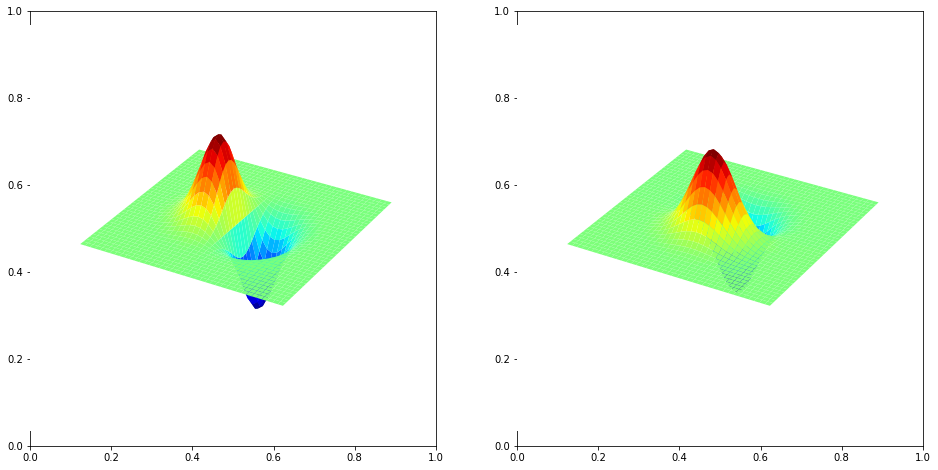

In [6]:
#Question 1
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')
sigma = 1

x = np.arange(-5, 5.25, 0.25)
y = np.arange(-5, 5.25, 0.25)
x, y = np.meshgrid(x, y)
z = np.exp(-(x**2+y**2)/(2*sigma**2))

kernel = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]], dtype=np.float64)
zx = cv.filter2D(z, -1, kernel)
kernel = np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]], dtype=np.float64)
zy = cv.filter2D(z, -1, kernel)

surf1 = ax1.plot_surface(x, y, zx, cmap=cm.jet, linewidth=0, antialiased=True)
surf2 = ax2.plot_surface(x, y, zy, cmap=cm.jet, linewidth=0, antialiased=True)

ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
cset = ax1.contourf(x, y, zx, zdir='z', offset=np.min(z)-1.5,cmap=cm.jet)
#ax1.set_zlim(np.min(zx)-2, np.max(zx))
cset = ax2.contourf(x, y, zy, zdir='z', offset=np.min(z)-1.5,cmap=cm.jet)
#ax2.set_zlim(np.min(zy)-2, np.max(zx))
ax1.axis('off')
ax2.axis('off')
plt.show()

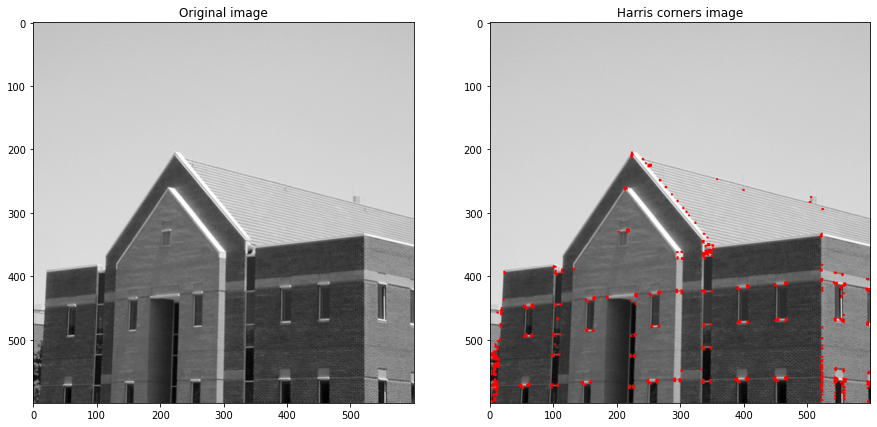

In [49]:
#Question 2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("building.tif",cv.IMREAD_COLOR)
img2 = np.copy(img)
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img1 = np.float32(img1)

harris = cv.cornerHarris(img1, 2, 3, 0.04)
harris = cv.dilate(harris,None)
img2[harris>0.01*harris.max()] = [0,0,255]
fig, ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1].set_title("Harris corners image")
plt.show()

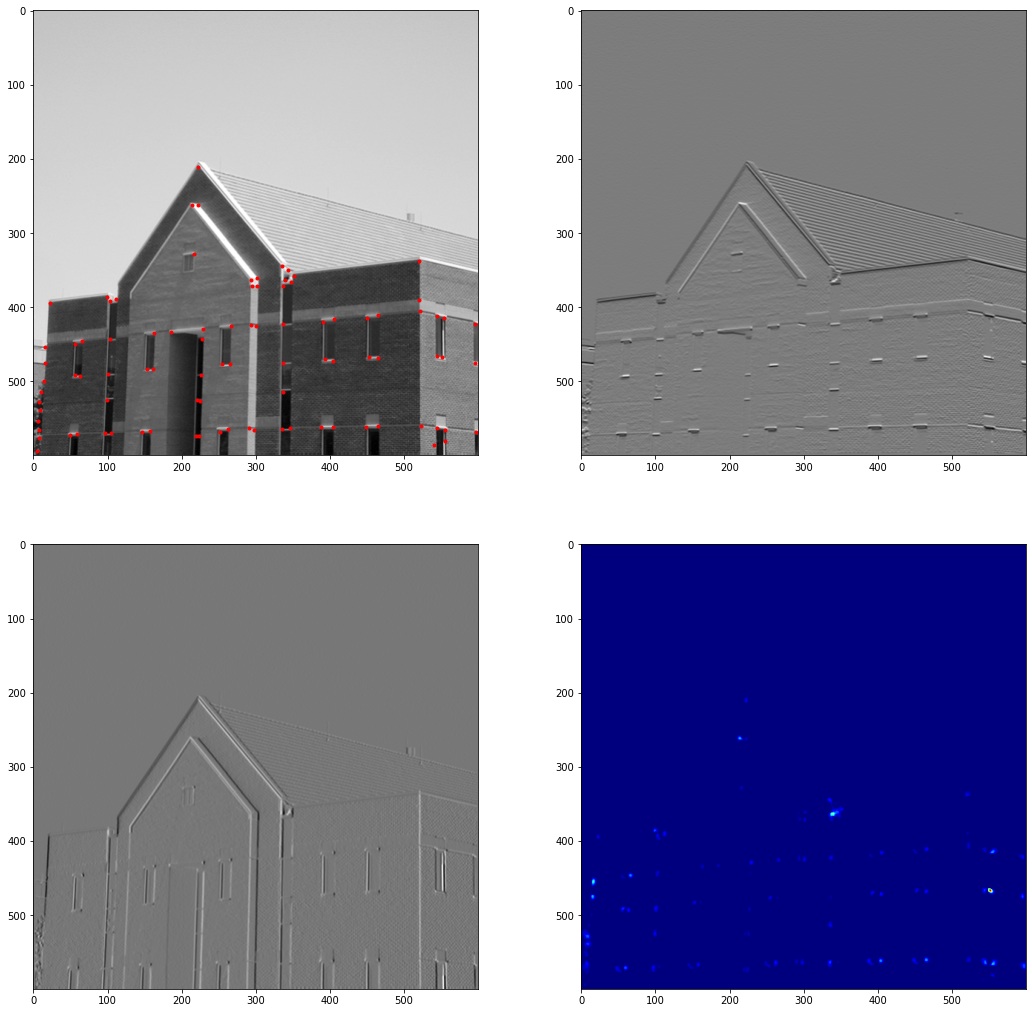

In [52]:
#Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

img = cv.imread("building.tif", cv.IMREAD_COLOR)
assert img is not None
I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype = np.float32)
sobel_h = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype = np.float32)

Ix = cv.filter2D(I, -1, sobel_v)
Iy = cv.filter2D(I, -1, sobel_h)

sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix, (ksize,ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize,ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize,ksize), sigma)
det = m11*m22 - m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e8]=0
coordinates = peak_local_max(R, min_distance=2)

fig, ax = plt.subplots(2,2, figsize=(18,18))
ax[0,0].imshow(img,cmap="gray")
ax[0,0].plot(coordinates[:,1],coordinates[:,0],"r.")
ax[0,1].imshow(Ix+127,cmap="gray")
ax[1,0].imshow(Iy+127,cmap="gray")
ax[1,1].imshow(R+127,cmap=cm.jet)
plt.show()

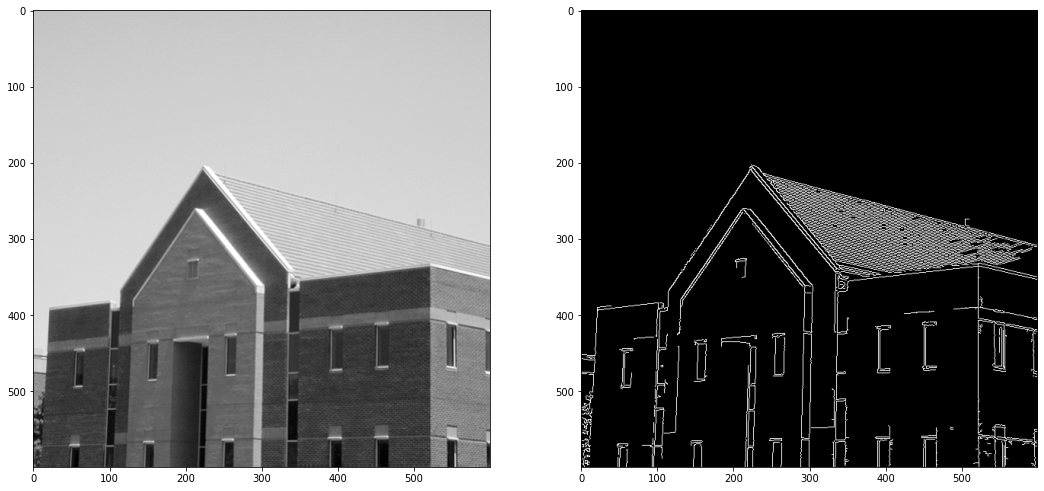

In [9]:
#Question 4
import cv2 as cv 
import matplotlib.pyplot as plt

img = cv.imread("building.tif", cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 100, 200)

fig, ax = plt.subplots(1, 2, figsize=(18,18))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(edges, cmap='gray')
plt.show()